In [57]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


df = pd.read_csv('wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [58]:
#Create a data frame
wine_df = pd.DataFrame(df)
wine_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [59]:
wine_df = wine_df.sort_values(by='price', ascending=False)
wine_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
338,Descendientes de J. Palacios,La Faraona Bierzo (Corullon),2010,4.6,28,Espana,Bierzo,3119.08,Red,4.0,3.0
196,Vega Sicilia,Unico,1965,4.6,218,Espana,Ribera del Duero,2884.04,Ribera Del Duero Red,5.0,3.0
115,Bodega Numanthia,Termanthia,2004,4.7,108,Espana,Toro,2814.16,Toro Red,5.0,3.0
343,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2011,4.6,27,Espana,Priorato,2750.00,Priorat Red,4.0,3.0
280,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2010,4.6,60,Espana,Priorato,2750.00,Priorat Red,4.0,3.0


Text(0.5, 0, 'Rating, Points')

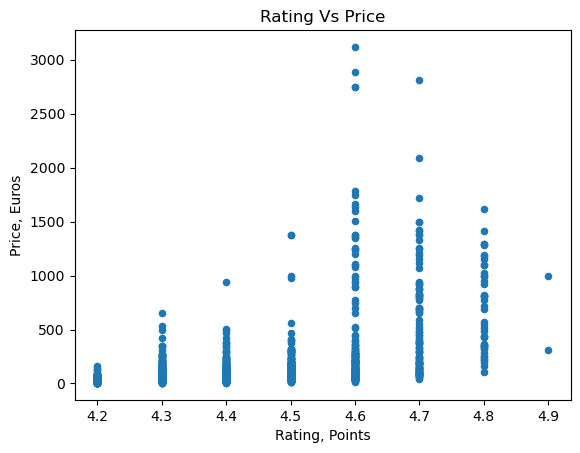

In [60]:
rating_vs_price_plot = wine_df.plot(kind='scatter', x='rating',y='price')
plt.title("Rating Vs Price")
plt.ylabel("Price, Euros")
plt.xlabel("Rating, Points")

([], [])

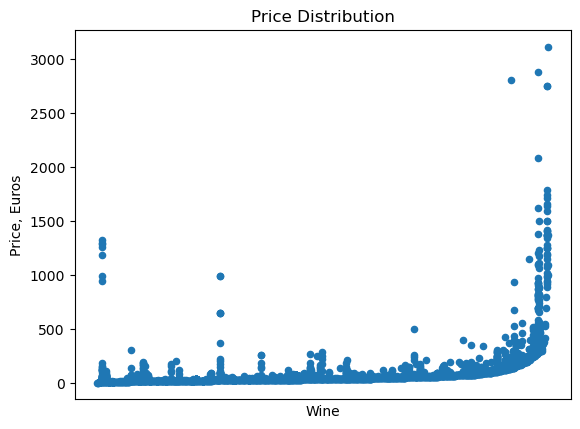

In [61]:
wine_df = wine_df.sort_values(by='price', ascending=True)
price_dist_plot = wine_df.plot(kind='scatter',x='wine',y='price')
plt.title("Price Distribution")
plt.ylabel("Price, Euros")
plt.xlabel("Wine")
plt.xticks([])

In [62]:
wine_df['winery'].value_counts()

winery
Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Marta Mate                                1
Marques de Burgos                         1
Guillem Carol - Cellers Carol Valles      1
Vins Miquel Gelabert                      1
Barbadillo                                1
Name: count, Length: 480, dtype: int64

In [63]:
wine_df['wine'].value_counts()

wine
Reserva                             467
Gran Reserva                        458
Rioja Reserva                       240
El Viejo                            224
Valdegines                          223
                                   ... 
Les Terrasses Laderas de Pizarra      1
Punta Esencia                         1
Sibila                                1
Les Eres Vinyes Velles                1
Altos de Losada El Cepon              1
Name: count, Length: 847, dtype: int64

In [64]:
wine_df['region'].value_counts()

region
Rioja                2440
Ribera del Duero     1413
Priorato              686
Toro                  300
Vino de Espana        263
                     ... 
Condado de Huelva       1
Abona                   1
Jerez Cream             1
Monterrei               1
Murcia                  1
Name: count, Length: 76, dtype: int64

In [65]:
wine_df['type'].value_counts()

type
Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Grenache                  35
Pedro Ximenez             35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Name: count, dtype: int64

In [66]:
wine_df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [67]:
wine_df.dropna(inplace=True)

In [68]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6329 entries, 1822 to 338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6329 non-null   object 
 1   wine         6329 non-null   object 
 2   year         6329 non-null   object 
 3   rating       6329 non-null   float64
 4   num_reviews  6329 non-null   int64  
 5   country      6329 non-null   object 
 6   region       6329 non-null   object 
 7   price        6329 non-null   float64
 8   type         6329 non-null   object 
 9   body         6329 non-null   float64
 10  acidity      6329 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 593.3+ KB


In [69]:

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.set_output(transform="pandas")
encoder.fit(wine_df[['winery', 'wine', 'region', 'type']])
encoded_columns = encoder.transform(wine_df[['winery', 'wine', 'region', 'type']])
# encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))
# print(encoded_columns)
column_names = encoder.get_feature_names_out()
print(column_names)
encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

['winery_AGE' 'winery_Aalto' 'winery_Abadal' ... 'type_Tempranillo'
 'type_Toro Red' 'type_Verdejo']


In [70]:
encoded_df.head()

,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,winery_Acustic Celler,winery_Adama Wines,winery_Adega Familiar Eladio Pineiro,winery_Agusti Torello Mata,winery_Albamar,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
1822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
wine_df_encoded = pd.concat([wine_df, encoded_df], axis=1)
wine_df_encoded.drop(['winery', 'wine', 'region', 'type', 'country'], axis=1, inplace=True)
wine_df_encoded.head()

,year,rating,num_reviews,price,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
1822,N.V.,4.2,32624,4.99,4.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1764,2021,4.3,32,6.26,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1947,2020,4.2,630,6.99,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2612,N.V.,4.2,405,7.10,4.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2912,N.V.,4.2,405,7.10,4.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# Convert non-numeric 'year' values to NaN
wine_df_encoded['year'] = pd.to_numeric(wine_df_encoded['year'], errors='coerce')

# Drop rows with NaN values in 'year' column
wine_df_encoded = wine_df_encoded.dropna(subset=['year'])

In [73]:
scaler = StandardScaler()
scaler.fit(wine_df_encoded)

scaled_data = scaler.transform(wine_df_encoded)
scaled_df = pd.DataFrame(scaled_data, columns=wine_df_encoded.columns)
scaled_df.head()


,year,rating,num_reviews,price,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
0,1.125990,0.318792,-0.674463,-0.369409,-1.959409,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,-0.516169,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,15.246689
1,0.986025,-0.480492,0.313930,-0.364998,-1.959409,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,-0.516169,-0.738721,8.341546,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588
2,0.846061,1.118075,-0.656282,-0.359560,-3.643102,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,-0.516169,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588
3,0.986025,1.118075,-0.682728,-0.359500,1.407978,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,1.937351,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588
4,0.846061,0.318792,-0.684380,-0.355451,1.407978,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,1.937351,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588


In [74]:
wine_df_encoded.corr()

,year,rating,num_reviews,price,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
year,1.000000,-0.299519,0.042120,-0.384351,-0.100687,0.155387,-0.096938,0.020723,0.012589,0.006799,...,-0.063803,-0.199310,0.043480,0.017776,-0.060871,-0.014287,0.017748,0.067575,0.137507,0.045252
rating,-0.299519,1.000000,-0.003144,0.551943,0.161058,-0.085140,0.004092,0.074640,0.001164,0.061987,...,0.168104,-0.156848,0.000335,0.024862,0.049320,0.032103,0.034708,0.011232,0.008503,0.061235
num_reviews,0.042120,-0.003144,1.000000,-0.045856,0.079627,0.050742,-0.008721,0.128458,-0.005859,0.059835,...,0.085506,0.021647,-0.019770,-0.014875,-0.011960,-0.018388,-0.008098,-0.035323,0.016511,-0.013291
price,-0.384351,0.551943,-0.045856,1.000000,0.150861,-0.030566,0.012611,0.002633,-0.006149,0.002651,...,0.148760,-0.101955,-0.012442,-0.007130,0.027208,0.001630,-0.007137,0.010452,0.017485,-0.013248
body,-0.100687,0.161058,0.079627,0.150861,1.000000,-0.001638,-0.003539,0.057195,-0.006131,-0.015853,...,0.726754,-0.203677,-0.234898,-0.043571,-0.005006,-0.104602,-0.012773,-0.059141,0.298446,-0.128514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
type_Sparkling,-0.014287,0.032103,-0.018388,0.001630,-0.104602,0.006252,-0.000369,-0.001166,-0.000638,-0.001651,...,-0.014820,-0.021210,-0.003442,-0.000638,-0.000521,1.000000,-0.001330,-0.006159,-0.006086,-0.001883
type_Syrah,0.017748,0.034708,-0.008098,-0.007137,-0.012773,0.010088,-0.000595,-0.001882,-0.001030,0.121709,...,-0.023913,-0.034223,-0.005554,-0.001030,-0.000841,-0.001330,1.000000,-0.009937,-0.009820,-0.003039
type_Tempranillo,0.067575,0.011232,-0.035323,0.010452,-0.059141,-0.836510,-0.002753,-0.008714,-0.004770,0.057762,...,-0.110719,-0.158456,-0.025715,-0.004770,-0.003894,-0.006159,-0.009937,1.000000,-0.045467,-0.014069
type_Toro Red,0.137507,0.008503,0.016511,0.017485,0.298446,0.046156,-0.002721,-0.008611,-0.004713,-0.012187,...,-0.109411,-0.156585,-0.025411,-0.004713,-0.003848,-0.006086,-0.009820,-0.045467,1.000000,-0.013903


In [75]:
y = wine_df_encoded['price']
X = wine_df_encoded.drop(columns='price')

In [76]:
from ClassificationDataPipeline import train_and_evaluate_models
df = pd.read_csv('wines_SPA.csv')
target_column = 'rating'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.9208, R² Score: 0.9208, MSE: 0.0013
KNN - Testing Score: 0.7925, R² Score: 0.7925, MSE: 0.0030
--------------------------------------------------
Random Forest - Training Score: 0.9741, R² Score: 0.9741, MSE: 0.0004
Random Forest - Testing Score: 0.8357, R² Score: 0.8357, MSE: 0.0024
--------------------------------------------------
Gradient Boosting - Training Score: 0.8595, R² Score: 0.8595, MSE: 0.0022
Gradient Boosting - Testing Score: 0.8341, R² Score: 0.8341, MSE: 0.0024
--------------------------------------------------
AdaBoost - Training Score: 0.7829, R² Score: 0.7829, MSE: 0.0034
AdaBoost - Testing Score: 0.7764, R² Score: 0.7764, MSE: 0.0032
--------------------------------------------------
SVM - Training Score: 0.4408, R² Score: 0.4408, MSE: 0.0088
SVM - Testing Score: 0.3185, R² Score: 0.3185, MSE: 0.0098
--------------------------------------------------
Linear Regression - Training Score: 0.9402, R² Score: 0.9402, MSE: 0.0009
Linear Regression 

In [77]:
from ClassificationDataPipeline import train_and_evaluate_models
df = pd.read_csv('wines_SPA.csv')
target_column = 'price'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.8770, R² Score: 0.8770, MSE: 3541.0849
KNN - Testing Score: 0.7210, R² Score: 0.7210, MSE: 5394.5639
--------------------------------------------------
Random Forest - Training Score: 0.9543, R² Score: 0.9543, MSE: 1317.1189
Random Forest - Testing Score: 0.7488, R² Score: 0.7488, MSE: 4857.3285
--------------------------------------------------
Gradient Boosting - Training Score: 0.9164, R² Score: 0.9164, MSE: 2406.8249
Gradient Boosting - Testing Score: 0.7430, R² Score: 0.7430, MSE: 4968.2191
--------------------------------------------------
AdaBoost - Training Score: -10.5648, R² Score: -10.5648, MSE: 333023.7483
AdaBoost - Testing Score: -16.2638, R² Score: -16.2638, MSE: 333756.9156
--------------------------------------------------
SVM - Training Score: 0.0865, R² Score: 0.0865, MSE: 26304.8921
SVM - Testing Score: 0.1173, R² Score: 0.1173, MSE: 17064.7195
--------------------------------------------------
Linear Regression - Training Score: 0.8752, R² S

In [78]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [79]:

cleaned_df = wine_df.drop(columns=['country', 'num_reviews'])
cleaned_df.head()

,winery,wine,year,rating,region,price,type,body,acidity
1822,Felix Solis,Mucho Mas Tinto,N.V.,4.2,Vino de Espana,4.99,Red,4.0,3.0
1764,Mocen,Seleccion Especial Verdejo,2021,4.3,Rueda,6.26,Verdejo,3.0,3.0
1947,Marques de Caceres,Rioja Satinela Blanco Semidulce,2020,4.2,Rioja,6.99,Rioja White,3.0,3.0
2612,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0
2912,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0


In [80]:
lbencoder = LabelEncoder()
labels = cleaned_df['type']
cleaned_df['type'] = lbencoder.fit_transform(labels)
cleaned_df.head()

,winery,wine,year,rating,region,price,type,body,acidity
1822,Felix Solis,Mucho Mas Tinto,N.V.,4.2,Vino de Espana,4.99,10,4.0,3.0
1764,Mocen,Seleccion Especial Verdejo,2021,4.3,Rueda,6.26,20,3.0,3.0
1947,Marques de Caceres,Rioja Satinela Blanco Semidulce,2020,4.2,Rioja,6.99,13,3.0,3.0
2612,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,15,4.0,3.0
2912,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,15,4.0,3.0


In [81]:
cleaned_df.dropna()

,winery,wine,year,rating,region,price,type,body,acidity
1822,Felix Solis,Mucho Mas Tinto,N.V.,4.2,Vino de Espana,4.99,10,4.0,3.0
1764,Mocen,Seleccion Especial Verdejo,2021,4.3,Rueda,6.26,20,3.0,3.0
1947,Marques de Caceres,Rioja Satinela Blanco Semidulce,2020,4.2,Rioja,6.99,13,3.0,3.0
2612,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,15,4.0,3.0
2912,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,15,4.0,3.0
...,...,...,...,...,...,...,...,...,...
280,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2010,4.6,Priorato,2750.00,9,4.0,3.0
343,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2011,4.6,Priorato,2750.00,9,4.0,3.0
115,Bodega Numanthia,Termanthia,2004,4.7,Toro,2814.16,19,5.0,3.0
196,Vega Sicilia,Unico,1965,4.6,Ribera del Duero,2884.04,11,5.0,3.0


In [82]:
from ClassificationDataPipeline import train_and_evaluate_models
df = cleaned_df
target_column = 'type'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.9810, R² Score: 0.9810, MSE: 0.2517
KNN - Testing Score: 0.9494, R² Score: 0.9494, MSE: 0.6739
--------------------------------------------------
Random Forest - Training Score: 0.9968, R² Score: 0.9968, MSE: 0.0425
Random Forest - Testing Score: 0.9578, R² Score: 0.9578, MSE: 0.5619
--------------------------------------------------
Gradient Boosting - Training Score: 0.9655, R² Score: 0.9655, MSE: 0.4563
Gradient Boosting - Testing Score: 0.9355, R² Score: 0.9355, MSE: 0.8589
--------------------------------------------------
AdaBoost - Training Score: 0.6853, R² Score: 0.6853, MSE: 4.1610
AdaBoost - Testing Score: 0.6667, R² Score: 0.6667, MSE: 4.4369
--------------------------------------------------
SVM - Training Score: 0.9097, R² Score: 0.9097, MSE: 1.1943
SVM - Testing Score: 0.8606, R² Score: 0.8606, MSE: 1.8559
--------------------------------------------------
Linear Regression - Training Score: 1.0000, R² Score: 1.0000, MSE: 0.0000
Linear Regression 

In [83]:
from ClassificationDataPipeline import train_and_evaluate_models
df = cleaned_df
target_column = 'price'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.8848, R² Score: 0.8848, MSE: 2526.3272
KNN - Testing Score: 0.6261, R² Score: 0.6261, MSE: 14893.4556
--------------------------------------------------
Random Forest - Training Score: 0.9617, R² Score: 0.9617, MSE: 840.3749
Random Forest - Testing Score: 0.6212, R² Score: 0.6212, MSE: 15089.1162
--------------------------------------------------
Gradient Boosting - Training Score: 0.9079, R² Score: 0.9079, MSE: 2019.8950
Gradient Boosting - Testing Score: 0.6212, R² Score: 0.6212, MSE: 15086.1494
--------------------------------------------------
AdaBoost - Training Score: -11.6009, R² Score: -11.6009, MSE: 276405.5124
AdaBoost - Testing Score: -6.0995, R² Score: -6.0995, MSE: 282775.9127
--------------------------------------------------
SVM - Training Score: 0.1037, R² Score: 0.1037, MSE: 19661.1311
SVM - Testing Score: 0.0686, R² Score: 0.0686, MSE: 37099.2187
--------------------------------------------------
Linear Regression - Training Score: 0.8699, R² S

In [84]:
from ClassificationDataPipeline import train_and_evaluate_models
df = cleaned_df
target_column = 'rating'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.9246, R² Score: 0.9246, MSE: 0.0011
KNN - Testing Score: 0.7937, R² Score: 0.7937, MSE: 0.0034
--------------------------------------------------
Random Forest - Training Score: 0.9703, R² Score: 0.9703, MSE: 0.0004
Random Forest - Testing Score: 0.7940, R² Score: 0.7940, MSE: 0.0034
--------------------------------------------------
Gradient Boosting - Training Score: 0.7929, R² Score: 0.7929, MSE: 0.0031
Gradient Boosting - Testing Score: 0.7619, R² Score: 0.7619, MSE: 0.0040
--------------------------------------------------
AdaBoost - Training Score: 0.5191, R² Score: 0.5191, MSE: 0.0072
AdaBoost - Testing Score: 0.5259, R² Score: 0.5259, MSE: 0.0079
--------------------------------------------------
SVM - Training Score: 0.4243, R² Score: 0.4243, MSE: 0.0087
SVM - Testing Score: 0.3956, R² Score: 0.3956, MSE: 0.0100
--------------------------------------------------
Linear Regression - Training Score: 0.9381, R² Score: 0.9381, MSE: 0.0009
Linear Regression 

,winery,wine,rating,num_reviews,region,price,type,body,acidity
winery,1.000000,-0.201983,-0.025371,-0.002786,0.018711,0.067725,-0.088183,0.090908,0.252386
wine,-0.201983,1.000000,0.058725,0.084620,0.163771,-0.006936,0.075400,-0.022976,-0.173308
rating,-0.025371,0.058725,1.000000,-0.000165,0.047921,0.620390,0.013178,0.163033,-0.094553
num_reviews,-0.002786,0.084620,-0.000165,1.000000,0.042097,-0.036491,0.009822,0.067106,0.040138
region,0.018711,0.163771,0.047921,0.042097,1.000000,0.276573,0.386518,0.334969,-0.161361
price,0.067725,-0.006936,0.620390,-0.036491,0.276573,1.000000,0.118739,0.307770,-0.165526
type,-0.088183,0.075400,0.013178,0.009822,0.386518,0.118739,1.000000,0.396738,-0.282808
body,0.090908,-0.022976,0.163033,0.067106,0.334969,0.307770,0.396738,1.000000,-0.017950
acidity,0.252386,-0.173308,-0.094553,0.040138,-0.161361,-0.165526,-0.282808,-0.017950,1.000000


k: 1, Train/Test Score: 0.999/0.721
k: 2, Train/Test Score: 0.877/0.720
k: 3, Train/Test Score: 0.822/0.719
k: 4, Train/Test Score: 0.799/0.720
k: 5, Train/Test Score: 0.786/0.719
k: 6, Train/Test Score: 0.777/0.718
k: 7, Train/Test Score: 0.771/0.718
k: 8, Train/Test Score: 0.764/0.718
k: 9, Train/Test Score: 0.761/0.718
k: 10, Train/Test Score: 0.757/0.720


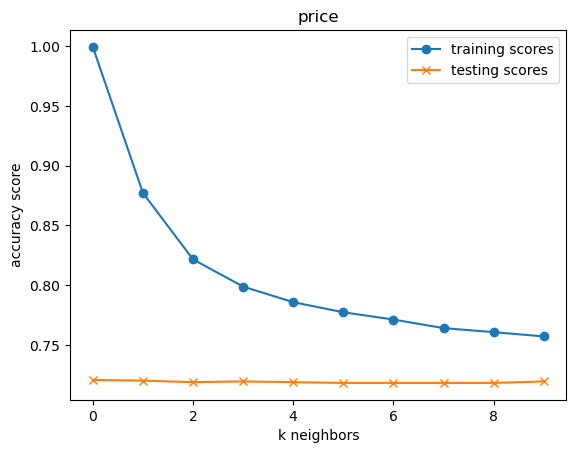

k: 1, Train/Test Score: 1.000/0.819
k: 2, Train/Test Score: 0.908/0.826
k: 3, Train/Test Score: 0.897/0.821
k: 4, Train/Test Score: 0.885/0.823
k: 5, Train/Test Score: 0.872/0.827
k: 6, Train/Test Score: 0.866/0.831
k: 7, Train/Test Score: 0.866/0.828
k: 8, Train/Test Score: 0.860/0.828
k: 9, Train/Test Score: 0.858/0.827
k: 10, Train/Test Score: 0.853/0.829


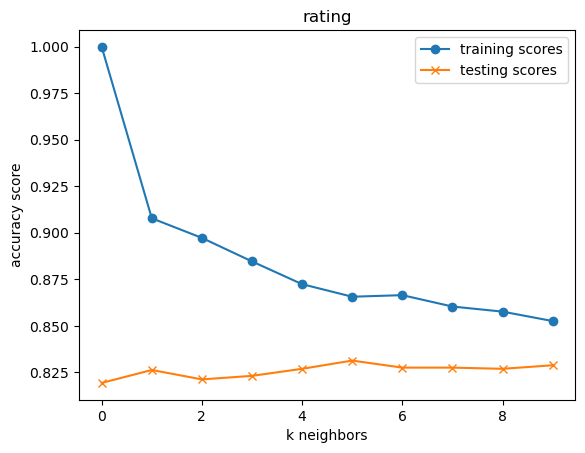

k: 1, Train/Test Score: 1.000/0.841
k: 2, Train/Test Score: 0.925/0.826
k: 3, Train/Test Score: 0.908/0.824
k: 4, Train/Test Score: 0.894/0.821
k: 5, Train/Test Score: 0.883/0.823
k: 6, Train/Test Score: 0.877/0.822
k: 7, Train/Test Score: 0.873/0.824
k: 8, Train/Test Score: 0.872/0.824
k: 9, Train/Test Score: 0.867/0.823
k: 10, Train/Test Score: 0.862/0.826


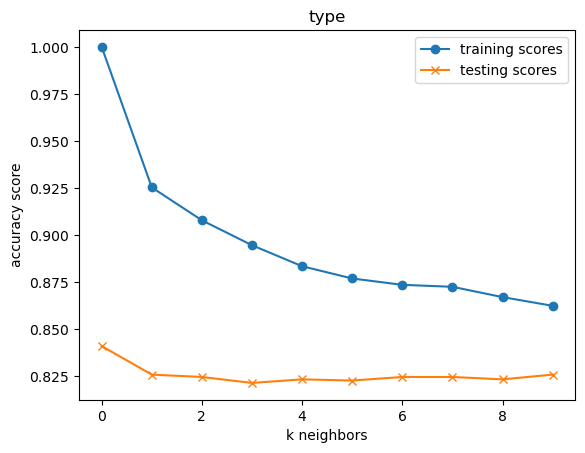

In [85]:
df=pd.read_csv('wines_SPA.csv')
df.drop(columns=['country', 'year'], inplace=True)
train_scores = []
test_scores = []
targets=['price', 'rating', 'type']
obj_columns=['winery', 'wine', 'region', 'type','price','rating']
for obj in obj_columns:
    encoder=LabelEncoder()
    label_encoded=encoder.fit_transform(df[obj])
    df[obj]=label_encoded
df_final= df.dropna()
display(df_final.corr())
for target in targets:
    y = df_final[target]
    X = df_final.drop(columns=target, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
    train_scores=[]
    test_scores=[]
    for k in range(1, 11, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    plt.plot(train_scores, marker='o', label="training scores")
    plt.plot(test_scores, marker="x", label="testing scores")
    plt.xlabel("k neighbors")
    plt.ylabel("accuracy score")
    plt.legend()
    plt.title(f'{target}')
    plt.show()

In [86]:
# from ClassificationDataPipeline import train_and_evaluate_models
# df = pd.read_csv('wine_df2.csv')
# df.head()

In [87]:
# df.drop(columns=['description','region_2','taster_name','taster_twitter_handle','Unnamed: 0'], inplace=True)

In [88]:
# target_column = 'points'
# Randomstate = 50
# accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
# print(accuracy_scores)

In [89]:
# target_column = 'title'
# Randomstate = 50
# accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
# print(accuracy_scores)

In [90]:
# target_column = 'price'
# Randomstate = 50
# accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
# print(accuracy_scores)

In [91]:
#MinMaxScaler 
df = cleaned_df
target_column = 'price'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.8848, R² Score: 0.8848, MSE: 2526.3272
KNN - Testing Score: 0.6261, R² Score: 0.6261, MSE: 14893.4556
--------------------------------------------------
Random Forest - Training Score: 0.9612, R² Score: 0.9612, MSE: 850.7719
Random Forest - Testing Score: 0.6371, R² Score: 0.6371, MSE: 14455.6636
--------------------------------------------------
Gradient Boosting - Training Score: 0.9079, R² Score: 0.9079, MSE: 2019.8950
Gradient Boosting - Testing Score: 0.6244, R² Score: 0.6244, MSE: 14959.4506
--------------------------------------------------
AdaBoost - Training Score: -8.6544, R² Score: -8.6544, MSE: 211772.5927
AdaBoost - Testing Score: -4.5055, R² Score: -4.5055, MSE: 219285.5871
--------------------------------------------------
SVM - Training Score: 0.1037, R² Score: 0.1037, MSE: 19661.1311
SVM - Testing Score: 0.0686, R² Score: 0.0686, MSE: 37099.2187
--------------------------------------------------
Linear Regression - Training Score: 0.8699, R² Sco

In [92]:
wine_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1822,Felix Solis,Mucho Mas Tinto,N.V.,4.2,32624,Espana,Vino de Espana,4.99,Red,4.0,3.0
1764,Mocen,Seleccion Especial Verdejo,2021,4.3,32,Espana,Rueda,6.26,Verdejo,3.0,3.0
1947,Marques de Caceres,Rioja Satinela Blanco Semidulce,2020,4.2,630,Espana,Rioja,6.99,Rioja White,3.0,3.0
2612,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0
2912,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0


In [93]:
wine_df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

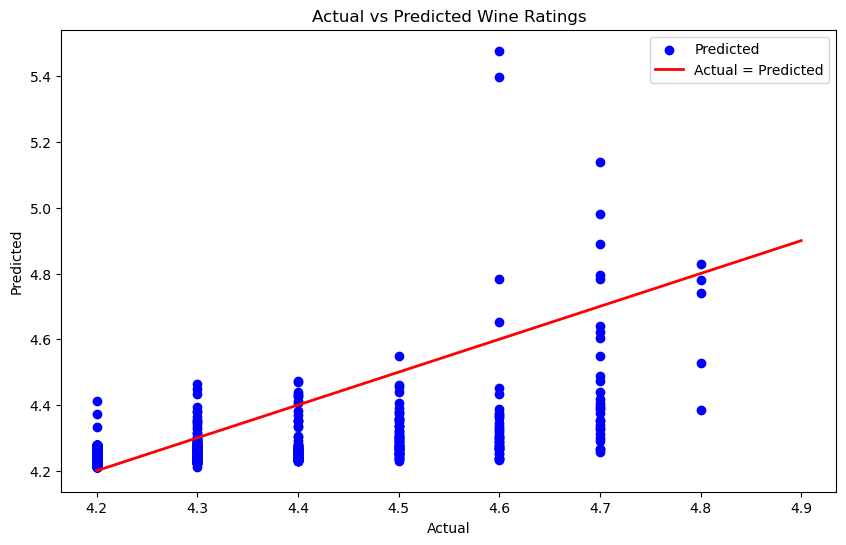

In [94]:
# Cleaning the data
wine_df_copy = wine_df.copy()  # Making a copy of the dataframe
wine_df_copy = wine_df_copy[wine_df_copy['rating'].apply(lambda x: isinstance(x, (int, float)))]

# Converting columns to the correct data types
wine_df_copy['rating'] = wine_df_copy['rating'].astype(float)
wine_df_copy['price'] = wine_df_copy['price'].astype(float)
wine_df_copy['acidity'] = wine_df_copy['acidity'].astype(float)

# Converting categorical data to numeric using one-hot encoding
wine_df_copy = pd.get_dummies(wine_df_copy, columns=['type', 'body'])

# Selecting relevant features and target variable
features = ["price", "acidity"] + [col for col in wine_df_copy.columns if col.startswith('type_') or col.startswith('body_')]
target = "rating"

X = wine_df_copy[features]
y = wine_df_copy[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting the actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Actual = Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Wine Ratings')
plt.legend()
plt.show()


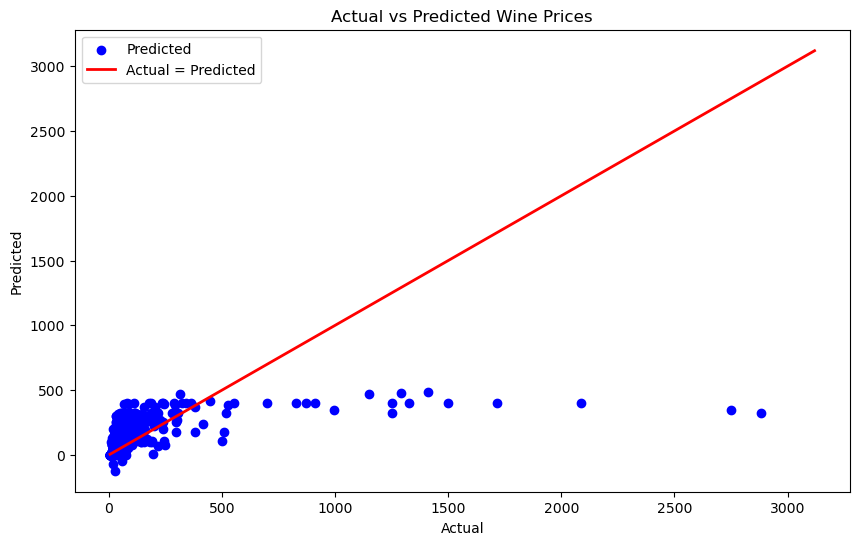

In [95]:
# Cleaning the data
wine_df_copy = wine_df.copy()  # Making a copy of the dataframe
wine_df_copy = wine_df_copy[wine_df_copy['rating'].apply(lambda x: isinstance(x, (int, float)))]

# Converting columns to the correct data types
wine_df_copy['rating'] = wine_df_copy['rating'].astype(float)
wine_df_copy['price'] = wine_df_copy['price'].astype(float)
wine_df_copy['acidity'] = wine_df_copy['acidity'].astype(float)

# Converting categorical data to numeric using one-hot encoding
wine_df_copy = pd.get_dummies(wine_df_copy, columns=['type', 'body'])

# Selecting relevant features and target variable
features = ["rating", "acidity"] + [col for col in wine_df_copy.columns if col.startswith('type_') or col.startswith('body_')]
target = "price"

X = wine_df_copy[features]
y = wine_df_copy[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting the actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Actual = Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Wine Prices')
plt.legend()
plt.show()


Mean Squared Error: 18344.915499492963


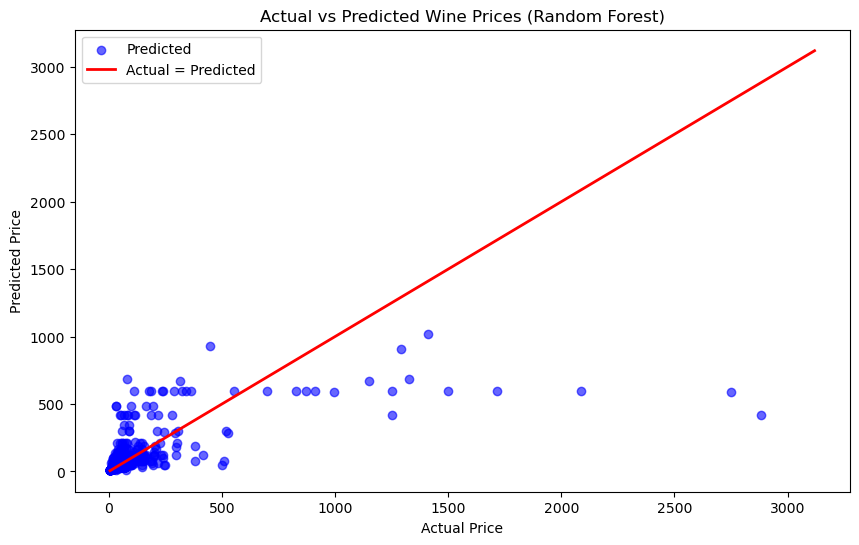

In [96]:
# Cleaning the data
wine_df_copy = wine_df.copy()  # Making a copy of the dataframe
wine_df_copy = wine_df_copy[wine_df_copy['rating'].apply(lambda x: isinstance(x, (int, float)))]

# Converting columns to the correct data types
wine_df_copy['rating'] = wine_df_copy['rating'].astype(float)
wine_df_copy['price'] = wine_df_copy['price'].astype(float)
wine_df_copy['acidity'] = wine_df_copy['acidity'].astype(float)

# Converting categorical data to numeric using one-hot encoding
wine_df_copy = pd.get_dummies(wine_df_copy, columns=['type', 'body'])

# Selecting relevant features and target variable
features = ["rating", "acidity"] + [col for col in wine_df_copy.columns if col.startswith('type_') or col.startswith('body_')]
target = "price"

X = wine_df_copy[features]
y = wine_df_copy[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Actual = Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Wine Prices (Random Forest)')
plt.legend()
plt.show()

Mean Squared Error: 18344.915499492963


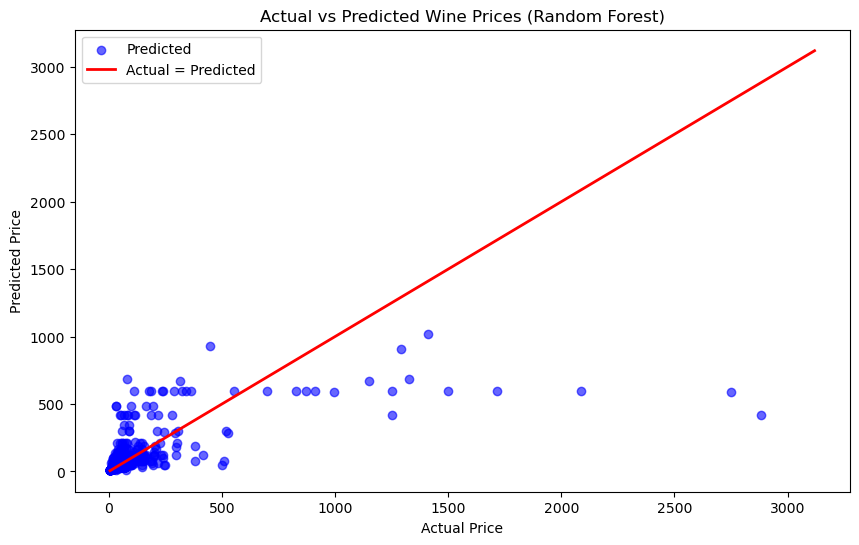

In [97]:
# Cleaning the data
wine_df_copy = wine_df.copy()  # Making a copy of the dataframe
wine_df_copy = wine_df_copy[wine_df_copy['rating'].apply(lambda x: isinstance(x, (int, float)))]

# Converting columns to the correct data types
wine_df_copy['rating'] = wine_df_copy['rating'].astype(float)
wine_df_copy['price'] = wine_df_copy['price'].astype(float)
wine_df_copy['acidity'] = wine_df_copy['acidity'].astype(float)

# Converting categorical data to numeric using one-hot encoding
wine_df_copy = pd.get_dummies(wine_df_copy, columns=['type', 'body'])

# Selecting relevant features and target variable
features = ["rating", "acidity"] + [col for col in wine_df_copy.columns if col.startswith('type_') or col.startswith('body_')]
target = "price"

X = wine_df_copy[features]
y = wine_df_copy[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Actual = Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Wine Prices (Random Forest)')
plt.legend()
plt.show()

Mean Squared Error: 0.004122349345265971


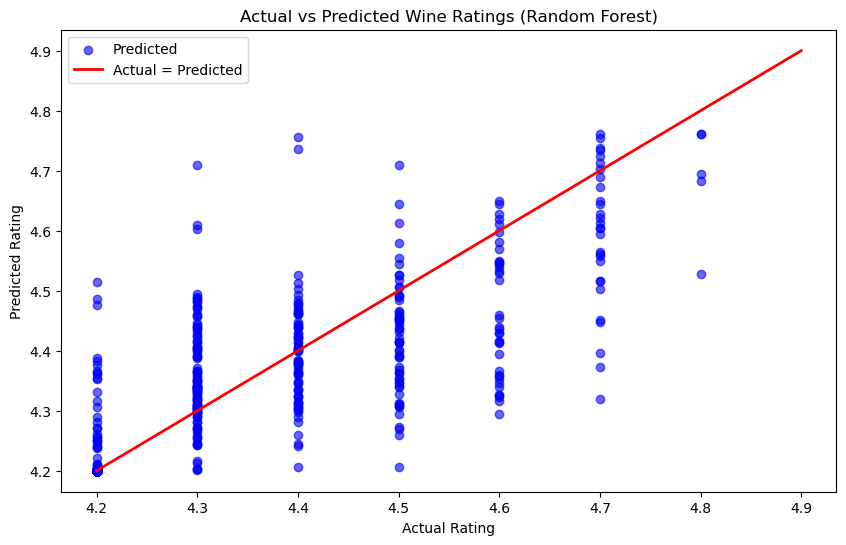

In [98]:
# Cleaning the data
wine_df_copy = wine_df.copy()  # Making a copy of the dataframe
wine_df_copy = wine_df_copy[wine_df_copy['rating'].apply(lambda x: isinstance(x, (int, float)))]

# Converting columns to the correct data types
wine_df_copy['rating'] = wine_df_copy['rating'].astype(float)
wine_df_copy['price'] = wine_df_copy['price'].astype(float)
wine_df_copy['acidity'] = wine_df_copy['acidity'].astype(float)

# Converting categorical data to numeric using one-hot encoding
wine_df_copy = pd.get_dummies(wine_df_copy, columns=['type', 'body'])

# Selecting relevant features and target variable
features = ["price", "acidity"] + [col for col in wine_df_copy.columns if col.startswith('type_') or col.startswith('body_')]
target = "rating"

X = wine_df_copy[features]
y = wine_df_copy[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Actual = Predicted')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Wine Ratings (Random Forest)')
plt.legend()
plt.show()

In [99]:
# Define the models and their scores
models_rating = ['KNN', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'SVM', 'Linear Regression']
train_scores_rating = [0.8602, 0.9742, 0.8595, 0.7850, 0.4407, 0.9402, 0.8512, 0.9696, 0.7892, 0.4684, 0.4376, 0.9401]
test_scores_rating = [0.8025, 0.8336, 0.8341, 0.7748, 0.3156, 0.7705, 0.8088, 0.8167, 0.7677, 0.4390, 0.2898, 0.7753]

models_price = ['KNN', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'SVM', 'Linear Regression']
train_scores_price = [0.7446, 0.9659, 0.9017, -12.0876, 0.0213, 0.8750, 0.7881, 0.9575, 0.9090, -12.2276, 0.0380, 0.8750, 0.8770, 0.9561, 0.9197, -8.4810, 0.0865, 0.8752]
test_scores_price = [0.7105, 0.7739, 0.7430, -18.5547, 0.0383, 0.7468, 0.6795, 0.7181, 0.7193, -18.8218, 0.0591, 0.7460, 0.7210, 0.7513, 0.7482, -13.1439, 0.1173, 0.7393]

# Create dataframes for each run
df_rating_run1 = pd.DataFrame({'Model': models_rating, 'Train Score': train_scores_rating[:6], 'Test Score': test_scores_rating[:6]})
df_rating_run2 = pd.DataFrame({'Model': models_rating, 'Train Score': train_scores_rating[6:], 'Test Score': test_scores_rating[6:]})

df_price_run1 = pd.DataFrame({'Model': models_price, 'Train Score': train_scores_price[:6], 'Test Score': test_scores_price[:6]})
df_price_run2 = pd.DataFrame({'Model': models_price, 'Train Score': train_scores_price[6:12], 'Test Score': test_scores_price[6:12]})
df_price_run3 = pd.DataFrame({'Model': models_price, 'Train Score': train_scores_price[12:], 'Test Score': test_scores_price[12:]})



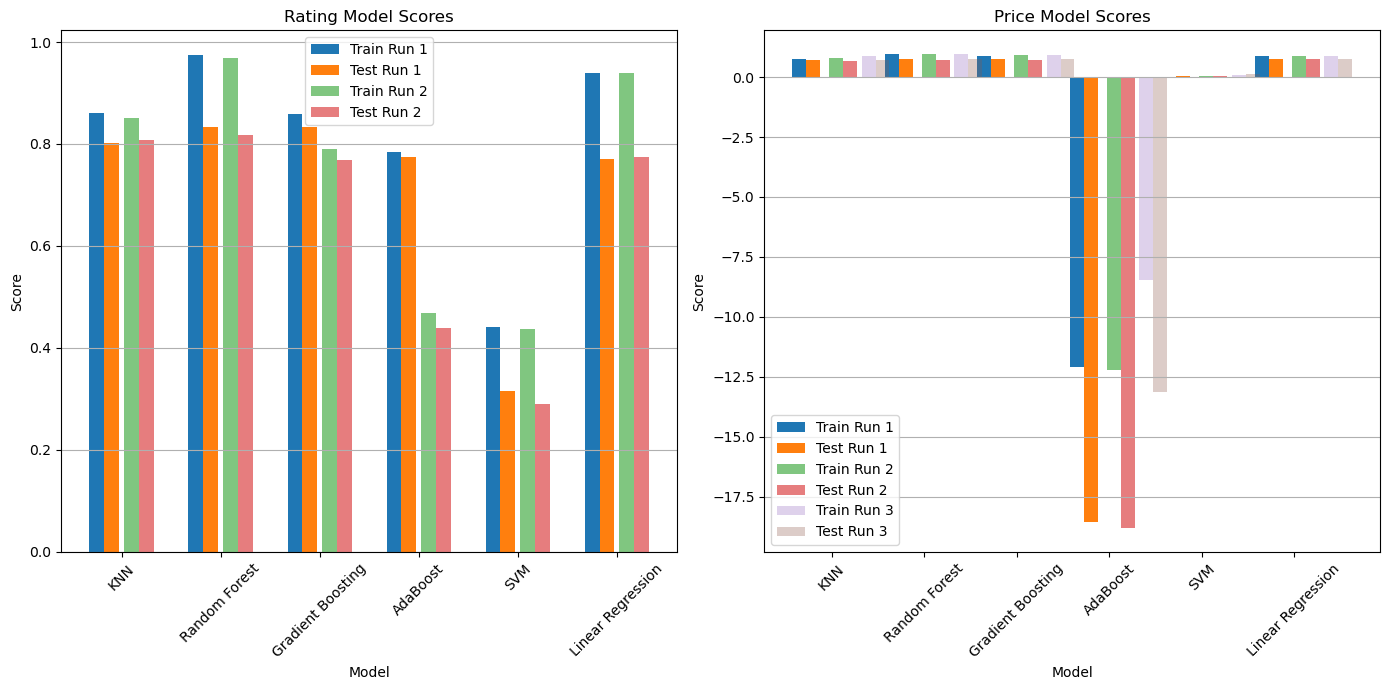

In [100]:
# Create bar plots for model performance with clear run differentiation and spacing
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Define bar width and spacing
width = 0.15  # the width of the bars
space = 0.05  # space between different runs
x = range(len(df_rating_run1['Model']))

# Plot for Rating Model Scores
axes[0].bar([p - width*1.5 - space/2 for p in x], df_rating_run1['Train Score'], width=width, label='Train Run 1', align='center')
axes[0].bar([p - width*0.5 - space/2 for p in x], df_rating_run1['Test Score'], width=width, label='Test Run 1', align='center')
axes[0].bar([p + width*0.5 + space/2 for p in x], df_rating_run2['Train Score'], width=width, label='Train Run 2', align='center', alpha=0.6)
axes[0].bar([p + width*1.5 + space/2 for p in x], df_rating_run2['Test Score'], width=width, label='Test Run 2', align='center', alpha=0.6)

axes[0].set_title('Rating Model Scores')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Score')
axes[0].set_xticks(x)
axes[0].set_xticklabels(df_rating_run1['Model'], rotation=45)
axes[0].legend()
axes[0].grid(axis='y')

# Plot for Price Model Scores
x = range(len(df_price_run1['Model']))

axes[1].bar([p - width*2 - space for p in x], df_price_run1['Train Score'], width=width, label='Train Run 1', align='center')
axes[1].bar([p - width - space for p in x], df_price_run1['Test Score'], width=width, label='Test Run 1', align='center')
axes[1].bar([p + space for p in x], df_price_run2['Train Score'], width=width, label='Train Run 2', align='center', alpha=0.6)
axes[1].bar([p + width + space for p in x], df_price_run2['Test Score'], width=width, label='Test Run 2', align='center', alpha=0.6)
axes[1].bar([p + width*2 + space*2 for p in x], df_price_run3['Train Score'], width=width, label='Train Run 3', align='center', alpha=0.3)
axes[1].bar([p + width*3 + space*2 for p in x], df_price_run3['Test Score'], width=width, label='Test Run 3', align='center', alpha=0.3)

axes[1].set_title('Price Model Scores')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(df_price_run1['Model'], rotation=45)
axes[1].legend()
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


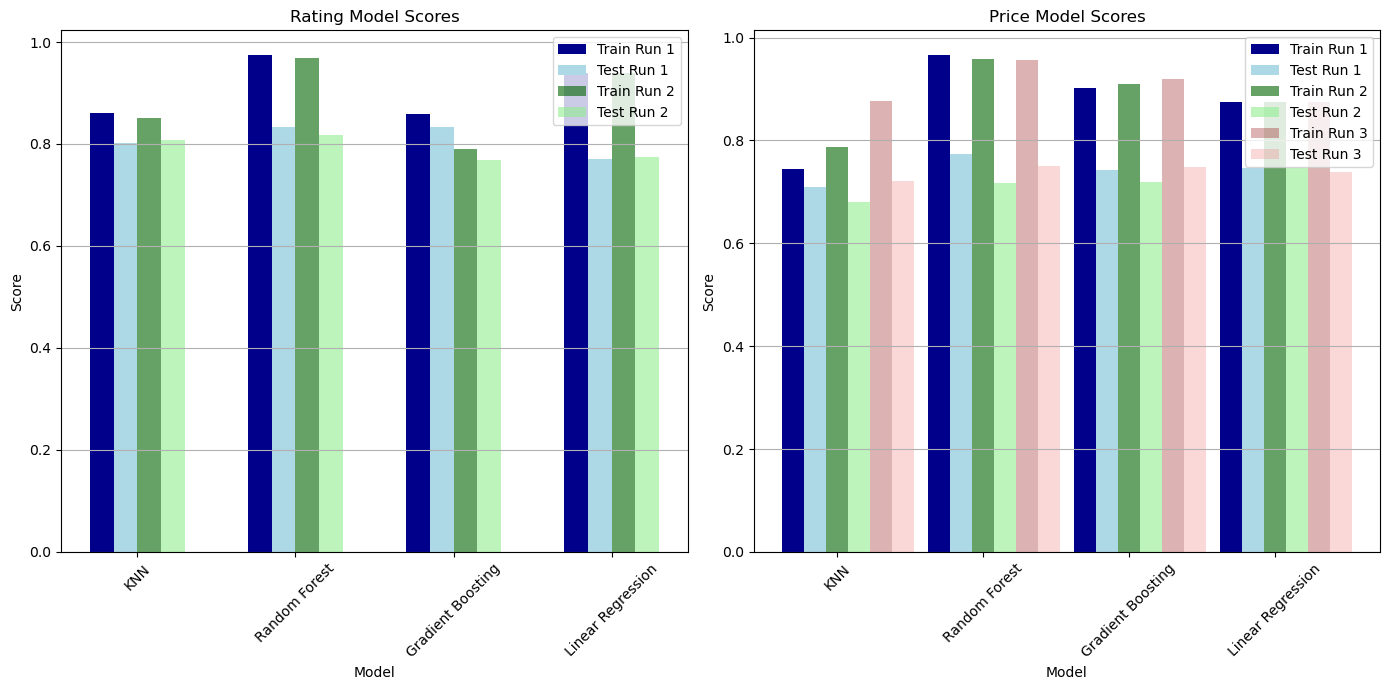

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out the AdaBoost and SVM models from the DataFrames
df_rating_run1_no_ada_svm = df_rating_run1[(df_rating_run1['Model'] != 'AdaBoost') & (df_rating_run1['Model'] != 'SVM')]
df_rating_run2_no_ada_svm = df_rating_run2[(df_rating_run2['Model'] != 'AdaBoost') & (df_rating_run2['Model'] != 'SVM')]

df_price_run1_no_ada_svm = df_price_run1[(df_price_run1['Model'] != 'AdaBoost') & (df_price_run1['Model'] != 'SVM')]
df_price_run2_no_ada_svm = df_price_run2[(df_price_run2['Model'] != 'AdaBoost') & (df_price_run2['Model'] != 'SVM')]
df_price_run3_no_ada_svm = df_price_run3[(df_price_run3['Model'] != 'AdaBoost') & (df_price_run3['Model'] != 'SVM')]

# Create bar plots for model performance with consistent color coding for the same runs
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Define bar width and colors
width = 0.15  # the width of the bars
colors = {
    'Train Run 1': 'darkblue',
    'Test Run 1': 'lightblue',
    'Train Run 2': 'darkgreen',
    'Test Run 2': 'lightgreen',
    'Train Run 3': 'darkred',
    'Test Run 3': 'lightcoral'
}

# Plot for Rating Model Scores
x = range(len(df_rating_run1_no_ada_svm['Model']))

axes[0].bar([p - width*1.5 for p in x], df_rating_run1_no_ada_svm['Train Score'], width=width, color=colors['Train Run 1'], label='Train Run 1', align='center')
axes[0].bar([p - width*0.5 for p in x], df_rating_run1_no_ada_svm['Test Score'], width=width, color=colors['Test Run 1'], label='Test Run 1', align='center')
axes[0].bar([p + width*0.5 for p in x], df_rating_run2_no_ada_svm['Train Score'], width=width, color=colors['Train Run 2'], label='Train Run 2', align='center', alpha=0.6)
axes[0].bar([p + width*1.5 for p in x], df_rating_run2_no_ada_svm['Test Score'], width=width, color=colors['Test Run 2'], label='Test Run 2', align='center', alpha=0.6)

axes[0].set_title('Rating Model Scores')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Score')
axes[0].set_xticks(x)
axes[0].set_xticklabels(df_rating_run1_no_ada_svm['Model'], rotation=45)
axes[0].legend()
axes[0].grid(axis='y')

# Plot for Price Model Scores
x = range(len(df_price_run1_no_ada_svm['Model']))

axes[1].bar([p - width*2 for p in x], df_price_run1_no_ada_svm['Train Score'], width=width, color=colors['Train Run 1'], label='Train Run 1', align='center')
axes[1].bar([p - width for p in x], df_price_run1_no_ada_svm['Test Score'], width=width, color=colors['Test Run 1'], label='Test Run 1', align='center')
axes[1].bar([p for p in x], df_price_run2_no_ada_svm['Train Score'], width=width, color=colors['Train Run 2'], label='Train Run 2', align='center', alpha=0.6)
axes[1].bar([p + width for p in x], df_price_run2_no_ada_svm['Test Score'], width=width, color=colors['Test Run 2'], label='Test Run 2', align='center', alpha=0.6)
axes[1].bar([p + width*2 for p in x], df_price_run3_no_ada_svm['Train Score'], width=width, color=colors['Train Run 3'], label='Train Run 3', align='center', alpha=0.3)
axes[1].bar([p + width*3 for p in x], df_price_run3_no_ada_svm['Test Score'], width=width, color=colors['Test Run 3'], label='Test Run 3', align='center', alpha=0.3)

axes[1].set_title('Price Model Scores')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(df_price_run1_no_ada_svm['Model'], rotation=45)
axes[1].legend()
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


# Price Predictions using Prophet

In [103]:
from prophet import Prophet     # Setup Prophet

In [104]:
cleaned_df_copy = cleaned_df.copy()   # Copy the cleaned dataframe to use going forward.  This creates a starting point for Prophet work.

In [105]:
cleaned_df_copy.dtypes     # let's review the columns types

winery      object
wine        object
year        object
rating     float64
region      object
price      float64
type         int32
body       float64
acidity    float64
dtype: object

In [106]:
# Drop rows with NaN values in 'year' column
cleaned_df_copy = cleaned_df_copy.dropna(subset=['year'])

In [107]:
# Create DataFrame containing rows for Contino winery only

cleaned_df_winery = cleaned_df_copy.loc[(cleaned_df_copy["winery"] == "Contino")]

# Change the year column to type string, and append end-of-year date for a full date of YYYY-12-31 
cleaned_df_winery['year'] = cleaned_df_winery['year'].astype("string") + '-12-31'

# Print out result
cleaned_df_winery

C:\Users\Keegan\AppData\Local\Temp\ipykernel_9724\604394464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_winery['year'] = cleaned_df_winery['year'].astype("string") + '-12-31'


,winery,wine,year,rating,region,price,type,body,acidity
4019,Contino,Reserva,2016-12-31,4.2,Rioja,19.98,12,4.0,3.0
7020,Contino,Reserva,2016-12-31,4.2,Rioja,19.98,12,4.0,3.0
7045,Contino,Reserva,2016-12-31,4.2,Rioja,19.98,12,4.0,3.0
4119,Contino,Reserva,2016-12-31,4.2,Rioja,19.98,12,4.0,3.0
2969,Contino,Reserva,2016-12-31,4.2,Rioja,19.98,12,4.0,3.0
...,...,...,...,...,...,...,...,...,...
1397,Contino,Rioja Graciano,2016-12-31,4.3,Rioja,64.75,12,4.0,3.0
279,Contino,Vina del Olivo,2001-12-31,4.6,Rioja,81.00,12,4.0,3.0
1930,Contino,Rioja Gran Reserva,2009-12-31,4.2,Rioja,85.80,12,4.0,3.0
787,Contino,Vina del Olivo,2016-12-31,4.4,Rioja,149.50,12,4.0,3.0


In [108]:
# Print out the count of Contino based wines
cleaned_df_winery["wine"].value_counts()

wine
Rioja Graciano        202
Reserva               200
Rioja Gran Reserva      6
Vina del Olivo          6
Name: count, dtype: int64

In [109]:
# Our two wines are serially selected (interchangably) for each run

# wine_df = cleaned_df_winery.loc[(cleaned_df_winery["wine"] == "Vina del Olivo")]  # Select only Vina del Olivo wine for price prediction

wine_df = cleaned_df_winery.loc[(cleaned_df_winery["wine"] == "Rioja Graciano")]   #  Select only Rioja Graciano wine for price prediction

# show result
wine_df

,winery,wine,year,rating,region,price,type,body,acidity
3318,Contino,Rioja Graciano,2011-12-31,4.2,Rioja,61.94,12,4.0,3.0
5168,Contino,Rioja Graciano,2011-12-31,4.2,Rioja,61.94,12,4.0,3.0
6043,Contino,Rioja Graciano,2011-12-31,4.2,Rioja,61.94,12,4.0,3.0
2468,Contino,Rioja Graciano,2011-12-31,4.2,Rioja,61.94,12,4.0,3.0
6194,Contino,Rioja Graciano,2011-12-31,4.2,Rioja,61.94,12,4.0,3.0
...,...,...,...,...,...,...,...,...,...
3993,Contino,Rioja Graciano,2011-12-31,4.2,Rioja,61.94,12,4.0,3.0
2793,Contino,Rioja Graciano,2011-12-31,4.2,Rioja,61.94,12,4.0,3.0
1352,Contino,Rioja Graciano,2015-12-31,4.3,Rioja,62.50,12,4.0,3.0
1483,Contino,Rioja Graciano,2017-12-31,4.3,Rioja,62.90,12,4.0,3.0


In [110]:
# Group Yearly Mean Price of Wine
def wine_mean(x):
    return x.mean()


wine_by_year_df = wine_df.groupby(["year"]). \
            apply(lambda x: pd.Series({"Yearly Mean Wine Price": wine_mean(x["price"])}))
wine_by_year_df

,Yearly Mean Wine Price
year,
2011-12-31,61.94
2015-12-31,62.50
2016-12-31,64.75
2017-12-31,62.90


In [111]:
wine_by_year_df.reset_index(inplace=True)                          # Reset index for conversion to a Datetime Index
                                                                   # Datetime index is required for the upcoming resample 
dt_series = pd.to_datetime((wine_by_year_df['year']))              # Save the date into a time series dataframe (from a string)
dt_indexed = pd.DatetimeIndex(dt_series.values)                    # create a datetime index using the date values.....           
wine_by_year_df2 = wine_by_year_df.set_index(dt_indexed)           # ... and set our index to those converted date values based as a datetime index (in new df)           

wine_by_year_df2.drop('year',axis=1,inplace=True)                  # drop the old date column as it is no longer needed
wine_by_year_df2                                                   # show the result


,Yearly Mean Wine Price
2011-12-31,61.94
2015-12-31,62.50
2016-12-31,64.75
2017-12-31,62.90


In [112]:
wine_by_day_df = wine_by_year_df2.resample('D').ffill()            # Add all the dates prior to 12/31 for all years in wine_by_year_df2...
                                                                   # ...and forward fill (ffill) each new row with the price from the previous (12-31) date 
                                                                   #
                                                                   #  bfill and ffill are used interchangably depending on the desired method
                                                                   #                                                                   
# wine_by_day_df = wine_by_year_df2.resample('D').bfill()          # Add all the dates prior to 12/31 for all years in wine_by_year_df2...  
                                                                   # ...and backward fill (bfill) each new row with the price from the next (12-31) date                                                                 #    
wine_by_day_df.tail                                                # Show result

<bound method NDFrame.tail of             Yearly Mean Wine Price
2011-12-31                   61.94
2012-01-01                   61.94
2012-01-02                   61.94
2012-01-03                   61.94
2012-01-04                   61.94
...                            ...
2017-12-27                   64.75
2017-12-28                   64.75
2017-12-29                   64.75
2017-12-30                   64.75
2017-12-31                   62.90

[2193 rows x 1 columns]>

In [113]:
wine_by_day_df.info()                                              # show new row counts, etc.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2193 entries, 2011-12-31 to 2017-12-31
Freq: D
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Yearly Mean Wine Price  2193 non-null   float64
dtypes: float64(1)
memory usage: 34.3 KB


In [114]:
# Revert back to a range based index  
wine_by_day_df.reset_index(inplace=True)                           # Reset to a RangeIndex from a DatatimeIndex for Prophet
wine_by_day_df.index

RangeIndex(start=0, stop=2193, step=1)

In [115]:
# drop the index to prep for Prophet
wine_by_day_df_prep = wine_by_day_df.reset_index(drop=True)

In [116]:
# Set columns up for Prophet
wine_by_day_df_prep.columns = ['ds', 'y']
wine_by_day_df_prep.head()

,ds,y
0,2011-12-31,61.94
1,2012-01-01,61.94
2,2012-01-02,61.94
3,2012-01-03,61.94
4,2012-01-04,61.94


In [117]:
#set up Prophet object (obj)

obj = Prophet()                                                     # Instantiate an instance of Prophet
obj

In [118]:
#fit data to Prophet object
obj.fit(wine_by_day_df_prep)                                        # fit our prepped data with samples by day

18:27:01 - cmdstanpy - INFO - Chain [1] start processing
18:27:02 - cmdstanpy - INFO - Chain [1] done processing


In [119]:
# set up prophet dataframe forcasting period for 12 periods (of 3 months) for frequency by quarter - 3 years total
future = obj.make_future_dataframe(periods=12, freq='q')

# .... or...

# set up prophet dataframe forcasting period for 36 period) (of 1 month) for frequency by month - 3 years total 
# future = obj.make_future_dataframe(periods=36, freq='m')

In [120]:
#Show end of forcasting dataframe
future.tail(40)

,ds
2165,2017-12-04
2166,2017-12-05
2167,2017-12-06
2168,2017-12-07
2169,2017-12-08
2170,2017-12-09
2171,2017-12-10
2172,2017-12-11
2173,2017-12-12
2174,2017-12-13


In [121]:
#produce Prophet forecast
forecast_trends_df = obj.predict(future)

c:\Users\Keegan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Keegan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


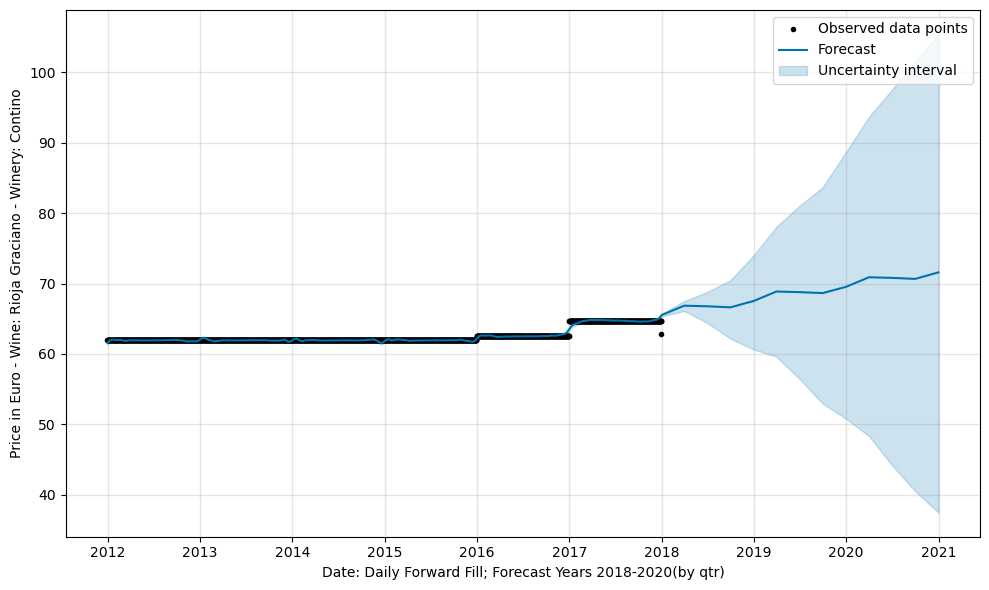

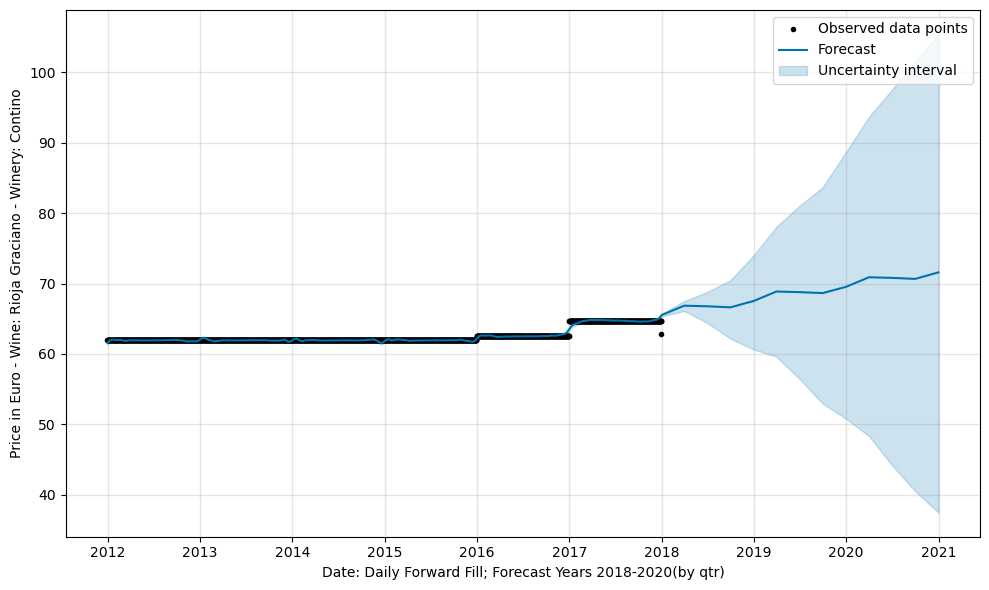

In [122]:
#Plot the results
obj.plot(forecast_trends_df,include_legend=True,xlabel='Date: Daily Forward Fill; Forecast Years 2018-2020(by qtr)',ylabel="Price in Euro - Wine: Rioja Graciano - Winery: Contino") 
